# 머신러닝 1장
## (생선 분류 문제)
### 혼자 공부하는 머신러닝 + 딥러닝

In [457]:
# 개념 정리
# 인공지능(Artificial Intelligence)이란?
# 사람처러 학습, 추론할 수 있는 지능을 가진 컴퓨터 시스템
# 80년 역사(1943년 ~)

# 인공지능 vs 기계학습 vs 딥러닝
# 인공 지능 : 인간처럼 학습하고 추론
# 기계 학습 : 자동으로 데이터에서 규칙을 학습하고 알고리즘 연구(데이터 중심 학습 및 예측)
# 딥러닝 : 인공 신경망 학습 알고리즘

In [458]:
# 생선 분류 문제
# 생선 마켓에서 도미와 빙어 분류 문제
# 전통적인 프로그램
# 다양한 생선 종류 (쩡해진 기준대로 분류)
# 길이만으로 분류하기 어려움
# if fish_length >= 30:
#     print('도미')

# 첫 번째 머신 러닝 프로그램
# 스스로 기준을 찾고, 기준을 이용하여 생선을 분류
# 기준 설정
# 생선의 길이와 무게로 비교
# 도미(bream) , 빙어(smelt)

In [459]:
# 도미 데이터 준비
# 도미(bream) 데이터 활용:
# 총 35마리의 데이터
# 길이와 무게를 이용한 산점도(scatter plot) 그리기
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]


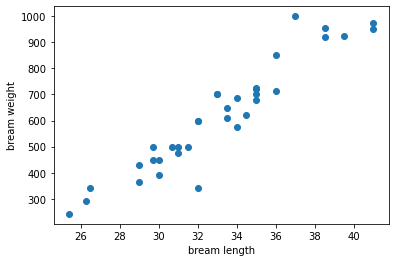

In [460]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length')  # x축은 길이
plt.ylabel('bream weight')  # y축은 무게
plt.show()
# 산점도 그래프
# 일직선에 가까운 선형 (linear) 그래프

In [461]:
# 빙어 데이터와 도미 데이터 비교
# 빙어(smelt) 데이터
# 총 14마리의 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 
                12.2, 12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 
                13.4, 12.2, 19.7, 19.9]


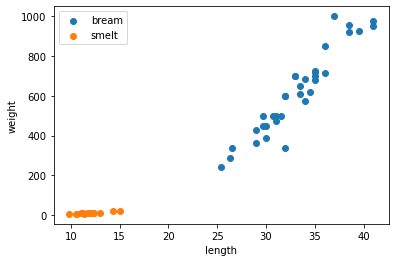

In [462]:
# 도미 데이터와 빙어 데이터 비교(산점도)
plt.scatter(bream_length, bream_weight, label = 'bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()
# 빙어의 크기와 무게가 도미와 많은 차이를 보임

In [463]:
# 2차원 리스트로 데이터 변형
# 도미 데이터와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [464]:
# 데이터 변형
# 1차원 리스트 2개를 2차원 리스트로 변경
# zip(length, weight) 함수를 이용
# 길이와 무게를 하나의 쌍으로 묶음
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)  # 사이킷런이 기댈하는 데이터 형태?

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [465]:
# 정답 데이터 준비
# 정답 데이터(fish_target) 준비
# 생선의 길이와 무게를 이용하여 도미(1)와 빙어(0)를 구분
# 찾고자 하는 데이터(도미)를 1로 설정

# 원본 데이터
# 도미 데이터: 35마리의 데이터를 1로 설정
# 빙어 데이터: 14마리의 데이터를 0으로 설정

fish_target = [1] * 35 + [0] * 14
print(fish_target)  # 도미(1) 빙어(0)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [466]:
# k-최근접 알고리즘 개요
# k-최근접 알고리즘(k-Nearest Neighbor, kNN)
# 가장 간단한 분류 알고리즘 (classification)
# '비슷한 특성을 가진 데이터는 비슷한 범주에 속한다'는 가정
# 주변의 가장 가까운 k개의 데이터를 보고, 데이터가 속할 그룹을 판단

# 단점
# 모든 데이터를 가지고 있어야 됨
# 많은 메오리 소모, 거리 계산에 많은 시간이 소요

In [467]:
# k-최근접 알고리즘 적용 과정
# 모델 생성 -> 모델 훈련(fit) -> 모델 평가(score) -> 새로운 데이터 결과 예측(predict)
# kNN 모델 생성
# KNEighborClassifier(n_neighbors, ...) 객체 생성
# 기본 이웃의 개수: n_neighbors=5
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [468]:
# 모델 훈련(학습)
# fit(Training data, Target values) 함수
# fish_data와 fish_target을 이용하여 모델 훈련
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [469]:
# 모델 평가: score() 함수
# score(Test samples, Target values): 정확도의 평균값 리턴
kn.score(fish_data, fish_target)

1.0

In [470]:
# 새로운 데이터를 활용한 결과 예측: predict(X)
# predict(X)
# X: 2차원 리스트 형태
kn.predict([[30, 600]])  # class label 리턴(0, 1)

array([1])

In [471]:
# k-최근접 알고리즘 속성
# _fit_X 속성
# 훈련 데이터를 모두 가짐(fish_data)
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [472]:
# _y 속성
# fish_target을 가짐
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [473]:
# k-최근접 알고리즘 속성
# n_neighbors 값 변경(49)
kn49 = KNeighborsClassifier(n_neighbors=49)

In [474]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
# fish_data의 49개 중에 도미 35개를 차지함

0.7142857142857143

In [475]:
# 35/49의 결과와 동일
print(35/49)

0.7142857142857143


In [476]:
# 마무리 정리
# 정확도 
# 정확한 답을 맞춘 백분율 (0 ~ 1 사이의 값)
# 정확도 = 정확히 맞힌 개수 / 전체 데이터 개수

# KNeighborClassifier()
# k-최근접 이웃 분류 모델
# n_neighbors 변수에 이웃의 개수를 지정 (default값 = 5)

# fit(특성데이터, 정답 데이터)
# 모델 훈련

# score(특성데이터, 정답데이터)
# 모델의 성능 측정

# predict(특성데이터)
# 모델 결과 예측

In [477]:
# Python 참고 자료

In [478]:
# zip() 함수
# 2개 이상의 리스트를 받아서 하나로 묶음 (튜플 형태로 묶음)

numbers =[1,2,3,4]
letters=['A','B','C','D']
for pair in zip(numbers, letters):  # 하나로 묶어서 출력
    print(pair)
    
pair = list(zip(numbers, letters))
print(pair)

n1, l1 = zip(*pair)  # zip 해제: *사용
print(n1, l1)

(1, 'A')
(2, 'B')
(3, 'C')
(4, 'D')
[(1, 'A'), (2, 'B'), (3, 'C'), (4, 'D')]
(1, 2, 3, 4) ('A', 'B', 'C', 'D')


# 머신러닝 2장
## (데이터 다루기)
### 혼자 공부하는 머신러닝 + 딥러닝

In [479]:
# 지도 학습과 비지도 학습
# 지도 학습 (Supervised Learning)
# 훈련을 위한 데이터(training data)와 정답이 필요
# 훈련 데이터 = 입력(input) + 정답(target)
# 알고리즘이 정답을 맞추는지 학습
# 분류, 회귀

# 비지도 학습
# 정답(target)이 없고, 입력 데이터만 사용
# 비슷한 특징끼리 군집화
# 새로운 데이터에 대한 결과 예측
# 클러스터링(Clustering)

# 강화 학습
# 현재 상태에서 어떤 행동을 취하는 것이 최선인지를 학습
# {입력값-출력값}의 쌍이 정해지지 않음
# 보상(reward)을 최대화하는 방법으로 학습
# 바둑에서 승리, 주식 거래의 비용, 최종적으로 벌어들인 돈 등

In [480]:
# 훈련 세트와 테스트 세트
# 1장 모델의 문제점
# 모든 데이터를 가지고 있음: 정답을 알고 있음
# 정확도: 100%

# 훈련 세트와 테스트 세트 분리
# 알고리즘의 정확한 평가
# 훈련 데이터와 평가할 데이터가 달라야 됨

# 정확한 평가를 위한 데이터 세트 준비 방법
# 새로운 데이터를 준비
# 이미 준비된 데이터의 일부분을 사용

# 훈련 세트(train set)
# 훈련에 사용되는 데이터

# 테스트 세트 (test set)
# 평가에 사용되는 데이터

In [481]:
# 훈련 세트와 테스트 세트 만들기 #1
# 도미와 빙어 데이터를 2차원 리스트로 변경
# 총 49마리의 데이터: 도미 35마리, 빙어 14마리
# zip() 함수 사용

# 데이터 생성
# 길이와 무게를 합친 2차원 리스트 생성: fish_data
# 결과 확인을 위한 리스트 생성: fish_target
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
              30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
              33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0,
              36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,  
              10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
              12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
               925.0, 975.0, 950.0, 6.7,  7.5, 7.0, 9.7, 9.8, 8.7, 
               10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [482]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]  # 2차원 리스트[길이, 무게]
fish_target = [1] * 35 + [0] * 14  # target 값 생성
fish_data, fish_target

([[25.4, 242.0],
  [26.3, 290.0],
  [26.5, 340.0],
  [29.0, 363.0],
  [29.0, 430.0],
  [29.7, 450.0],
  [29.7, 500.0],
  [30.0, 390.0],
  [30.0, 450.0],
  [30.7, 500.0],
  [31.0, 475.0],
  [31.0, 500.0],
  [31.5, 500.0],
  [32.0, 340.0],
  [32.0, 600.0],
  [32.0, 600.0],
  [33.0, 700.0],
  [33.0, 700.0],
  [33.5, 610.0],
  [33.5, 650.0],
  [34.0, 575.0],
  [34.0, 685.0],
  [34.5, 620.0],
  [35.0, 680.0],
  [35.0, 700.0],
  [35.0, 725.0],
  [35.0, 720.0],
  [36.0, 714.0],
  [36.0, 850.0],
  [37.0, 1000.0],
  [38.5, 920.0],
  [38.5, 955.0],
  [39.5, 925.0],
  [41.0, 975.0],
  [41.0, 950.0],
  [9.8, 6.7],
  [10.5, 7.5],
  [10.6, 7.0],
  [11.0, 9.7],
  [11.2, 9.8],
  [11.3, 8.7],
  [11.8, 10.0],
  [11.8, 9.9],
  [12.0, 9.8],
  [12.2, 12.2],
  [12.4, 13.4],
  [13.0, 12.2],
  [14.3, 19.7],
  [15.0, 19.9]],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0

In [483]:
# 훈련 세트와 테스트 세트 만들기 #2
# 훈련 세트와 테스트 세트 만들기
# fish_data, fish_target 리스트를 훈련 세트와 테스트 세트로 분리
# 훈련 세트: 35개, 테스트 세트: 14개로 분리

# 훈련 세트 구성
# train_input: 훈련용 입력 데이터
# train_target: 훈련용 정답 데이터

# 테스트 세트 구성
# test_input: 테스트 입력 데이터
# test_target: 테스트 정답 데이터

In [484]:
# 훈련 세트 생성(35개)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트 생성(14개)
test_input = fish_data[35:]
test_target = fish_target[35:]

In [485]:
# 테스트 세트로 평가하기
# k-최근접 알고리즘 모델 생성 및 평가하기
# 훈련 세트로 모델을 훈련
# 테스트 세트로 정확도 평가
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()  # 객체 생성
kn = kn.fit(train_input, train_target)  # 모델 훈련
kn.score(test_input, test_target)  # 테스트 세트로 평가 (정확도 출력)
# 잘못된 훈련 데이터 사용 결과
# 정확도 0.0
# 훈련 세트(도미), 테스트 세트(빙어)
# 잘못된 훈련 데이터(샘플링 편향)

0.0

In [486]:
# Numpy를 활용한 배열 생성
# Numpy 사용
# 다차원 배열을 쉽게 조작할 수 있음

# 기존 fish_data와 fish_target를 Numpy 배열로 변경
# Numpy.array(list): 파이썬의 list를 Numpy의 array로 변경
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape)  # shape: 배열의 크기 리턴

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [487]:
# Numpy를 이용하여 데이터 섞기
# Numpy 사용
# random.seed(seed) : 랜덤값 생성을 위한 초기값 지정
# 초기값(seed)값이 같으면 동일한 랜덤값을 뽑을 수 있음
# Numpy.arange(stop): stop-1까지 1의 간격으로 배열 생성
# arange: array range
# random.shuffle(x): 배열x(ndarray 타입)를 무작위로 섞음
import numpy as np

np.random.seed(42)
index_list = np.arange(49)  # 0~48까지 값을 가지는 배열 생성
print(index_list)
type(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


numpy.ndarray

In [488]:
np.random.shuffle(index_list)  # 배열 내용을 무작위로 섞음
print(index_list)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [489]:
# 랜덤 배열로 훈련 세트와 테스트 세트 만들기
# Numpy의 배열 인덱싱 이용
# 여러 개의 인덱스로 한 번에 여러 개의 배열 원소를 선택할 수 있음
# 훈련 세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]

# 테스트 세트 생성
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

# 올바른 훈련 데이터

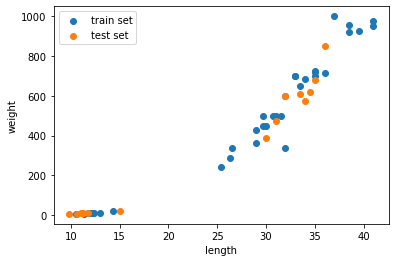

In [490]:
# 무작위로 섞인 데이터 확인하기
# 훈련 데이터와 테스트 데이터 다시 화긴
import matplotlib.pyplot as plt
# [:, 0]: length, [:, 1]: weight
plt.scatter(train_input[:, 0], train_input[:, 1], label='train set')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test set')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [491]:
# 두 번째 머신러닝 프로그램
# 무작위로 섞인 훈련 세트와 테스트 세트를 이용한 k-최근접 이웃 모델 생성 및 훈련
# fit() -> score() -> predict() 호출
kn = kn.fit(train_input, train_target)
print('score: ', kn.score(test_input, test_target))

print('predict: ', kn.predict(test_input))
print('test_target: ', test_target)  # predict 결과값과 비교를 위해 출력
# [0, ..0]: Numpy 배열
# scikit-learn 모델의 입출력 값은 모두 Numpy의 배열
# 100% 정확도

score:  1.0
predict:  [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
test_target:  [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [492]:
# 문제점 발생
# 2-1 머신러닝 프로그램의 문제점 발생
# 길이 25cm, 무게 150g인 도미를 빙어로 판단
print('predict(길이 25cm, 무게 150g): ', kn.predict([[25, 150.0]]))

predict(길이 25cm, 무게 150g):  [0]


In [493]:
# 샘플 데이터의 두 특성(길이, 무게)의 스케일이 다르기 때문
# 스케일을 조정해야 됨: 표준점수로 반환해야 됨
# 표준 점수: 평균과의 거리

In [494]:
# Numpy를 활용한 데이터 전처리 #1
# column_stack()
# Numpy 제공 함수: 리스트를 일렬로 세운 다음 차례대로 연결
# Python에서 제공하는 zip()함수와 동일한 기능
# column_stack((list1, list2)): 튜플 형태로 전달
fish_dat = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [495]:
# ones(n), zeros(n)
# 개수(n)만큼 각각 1과 0으로 채운 배열을 생성함
print(np.ones(35))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [496]:
print(np.zeros(14))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [497]:
# Numpy를 활용한 데이터 전처리 #2
# concatenate(a1, a2, ...)
# a1, a2 배열을 서로 연결함 (a1 배열 다음에 a2 배열 연결)
# 연결할 배열을 튜플로 전달
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [498]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기 #1
# 사이킷런으로 훈련 세트와 테스트 세트 나누기
# train_test_split() 함수 원형
# sklearn.model_selection.train_test_split(*arrays, test_size=None,
# train_size=None, random_state=None, shuffle=True, stratify=None)
# 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나눔
# 총 4개의 배열이 반환됨

# 함수 파라미터 내용
# test_size: 0.0 ~ 1.0 사이
# None: 자동으로 25% 비율로 테스트 세트 생성
# train_size: 0.0 ~ 1.0 사이
# None: 자동으로 75% 비율로 훈련 세트 생성
# random_state: 랜덤 시드 설정
# stratify: target 데이터를 전달하면, 클래스 비율(0, 1)에 맞게 데이터를 나눔
# fish_data , fish_target 
# train_test_split()
# train_input, test_input // train_target, test_target

In [499]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기 #1
# 4개의 데이터 셋을 리턴
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, stratify=fish_target, random_state=42)

train_input = np.array(train_input)
test_input = np.array(test_input)

print('train_input.shape: ', train_input.shape,
     'test_input.shape: ', test_input.shape)

train_input.shape:  (36, 2) test_input.shape:  (13, 2)


In [500]:
print('train_target: ', train_target)

train_target:  [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [501]:
print('test_target: ', test_target)

test_target:  [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [502]:
# 가장 가까운 이웃 찾기 #1
# k-최근접 이웃 모델 적용
# train_test_split() 함수로 나눈 데이터 사용
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print('score: ', kn.score(test_input, test_target))

score:  1.0


In [503]:
# 25cm, 150g의 생선 분류 (수상한 도미)
print(kn.predict([[25, 150]]))
# 빙어로 분류

[0.]


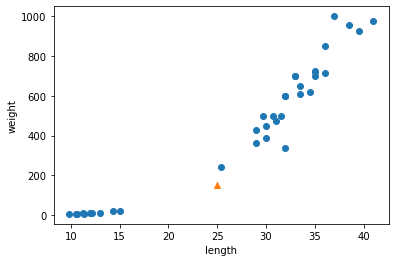

In [504]:
# 가장 가까운 이웃 찾기 #2
# 길이 25cm, 무게 150g의 생선을 산점도로 표시
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [505]:
# 가장 가까운 이웃과의 거리 계산
# kneighbors(): n_neighbors(default값 5)개의 이웃을 찾음
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


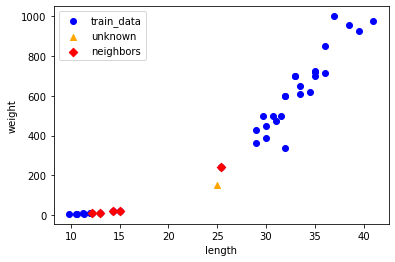

In [506]:
# 가장 가까운 이웃 찾기 #2
# 가장 가까운 이웃 5개를 산점도로 표시
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1], label='train_data',
           color='b')
plt.scatter(25, 150, marker='^', color='orange', label='unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
           marker='D', label='neighbors', color='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [507]:
print('neighbors: ', train_input[indexes])
print('target: ', train_target[indexes])  # (25cm, 150g) 생선의 이웃 4개는 빙어

neighbors:  [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
target:  [[1. 0. 0. 0. 0.]]


In [508]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


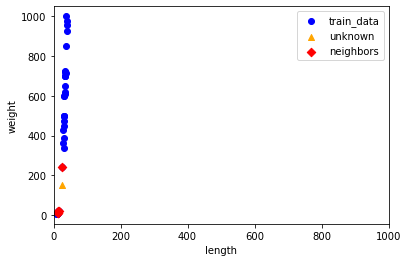

In [509]:
# Scale을 동일하게 수정
# x축과 y축의 범위를 동일하게 수정
# 두 특성(길이, 무게)의 scale이 다름
# xlim(), ylim()함수: x, y축의 범위를 지정
plt.scatter(train_input[:, 0], train_input[:, 1], label='train_data',
           color='b')
plt.scatter(25, 150, marker='^', color='orange', label='unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
           marker='D', label='neighbors', color='r')

plt.xlim((0, 1000))  # x축의 눈금 간격을 y축과 동일하게 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()
# 생선의 무게에 따라 분류에 큰 영향을 미침

In [510]:
# 데이터 전처리 (Data Preprocessing) #1
# 데이터 전처리
# 특성값을 일정한 기준으로 맞춤
# 표준 점수 (Standard Score, Z 점수)
# 각 특성(길이, 무게)의 값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄
# Z = x - m / 시그마 (x: 특성값, m: 평균, 시그마: 표준편차)

# 평균 및 표준편차 계산
# 브로드 캐스팅
# 행(row)이나 열(column)의 모든 데이터에 대해 한 번에 연산을 수행
mean = np.mean(train_input, axis=0)  # axis=0: 각 컬럼의 평균 계산
std = np.std(train_input, axis=0)
print(mean, std)
# length평균, weight평균, length표준편차, weight표준편차

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [511]:
# 데이터 전처리 (Data Preprocessing) #2
# 표준 점수(Z값 계산)
# z = 특성값 - 평균 / 표준편차
train_scaled = (train_input - mean) / std  # 표준 점수로 변환한 데이터
print(train_scaled[:3])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]]


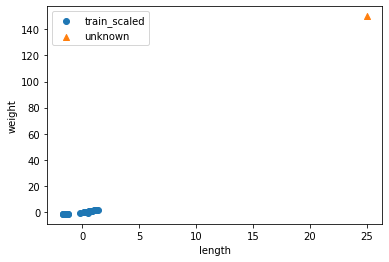

In [512]:
# 전처리 데이터로 모델 훈련 #1
# 표준 점수로 변환한 훈련 데이터 분포 확인
# train_scaled 데이터와 샘플 데이터(25, 150) 비교
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(25, 150, marker='^', label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()
# 샘플 데이터(25, 150)은 표준 점수가 아님

표준 점수 sample [-0.23012627 -0.94060693]


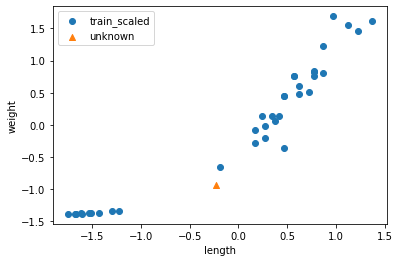

In [513]:
# 전처리 데이터로 모델 훈련 #2
# 샘플 데이터를 표준 점수로 변환
new = ([25, 150] - mean) / std
print('표준 점수 sample', new)

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(new[0], new[1], marker='^', label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [514]:
# 전처리 데이터로 모델 훈련 #3
# 표준 점수로 변환한 훈련 데이터로 k-최근접 이웃 모델 훈련
# 표준점수로 변환한 훈련 데이터로 k-NN 훈련
kn.fit(train_scaled, train_target)

# 테스트 세트를 표준 점수로 변환
test_scaled = (test_input - mean) / std
print(kn.score(test_scaled, test_target))

# 표준 점수로 변환된 샘플 데이터를 가지고 예측
print(kn.predict([new]))
# 결과
# 길이가 25cm, 무게가 150g인 생선을 도미로 인식함

1.0
[1.]


[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]


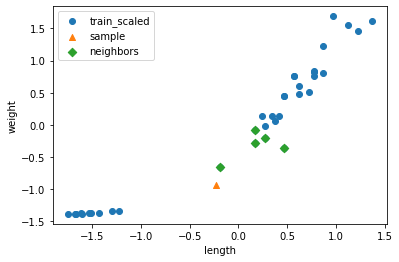

In [515]:
# 최종 이웃 찾기 및 산점도
# 표준 점수로 변경된 샘플 데이터의 이웃 찾기 및 산점도
distances, indexes = kn.kneighbors([new])
print(distances)

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(new[0], new[1], marker='^', label='sample')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1],
           marker='D', label='neighbors')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()
# 샘플 데이터(25cm, 150g)에 가장 가까운 이웃들은 도미

In [516]:
# 마무리 정리
# 특성의 스케일이 다른 경우
# 길이보다 무게에 따라 예측값이 변경되었음

# 스케일이 다른 특성 처리
# 훈련 세트 및 테스트 세트를 표준 점수로 변환

# 데이터 전처리
# 머신러닝 모델에 훈련 데이터를 입력하기 전에 가공하는 단계

# scikit-learn 함수 정리
# train_test_split()
# 입력 데이터를 훈련 세트와 테스트 세트로 자동으로 나눔
# 테스트 세트의 기본 크기: 25%
# kneighbors()
# k-최근접 이웃 모델에서 입력한 샘플 데이터와 가장 가까운 이웃을 찾음
# 거리와 인덱스 반환

# 머신러닝 3장
## (회귀 알고리즘과 모델 규제)
### 혼자 공부하는 머신러닝 + 딥러닝

## k-최근접 이웃 회귀

In [517]:
# 회귀 (Regression)
# 지도 학습(Supervised Learning)
# 훈련을 위한 데이터(training data)와 정답이 필요
# 훈련 데이터 = 입력(input) + 정답(target)
# 알고리즘이 정답을 맞추는지 학습

# 분류(Classification): 2장
# 테스트 세트의 샘플을 정확하게 분류한 개수의 비율: 정확도
# 정답을 맞힌 개수의 비율 (정확도)

# 회귀 (Regression)
# 두 변수 사이의 상관 관계를 분석하는 방법
# 기존 데이터를 이용해서 임의의 숫자를 예측하는 문제: 결정계수(R^2)
# 정확한 숫자를 맞춘다는 것은 불가능
# example
# 내년 경제 성장률 예측
# 배달 도착 시간 예측
# 농어의 무게 예측

In [518]:
# k-최근접 이웃 회귀
# k-최근접 이웃 분류 (2장)
# 예측하려는 샘플에 가장 가까운 이웃을 k개를 선택
# 이웃들의 클래스를 확인
# 샘플 주변의 다수의 클래스를 샘플의 클래스로 예측

# k-최근접 이웃 회귀
# 예측하려는 샘플에 가장 가까운 이웃 k개를 선택
# 이웃의 평균을 구함

In [519]:
# 데이터 준비
# 농어(perch)의 길이로 무게를 잘 예측할 수 있을까?
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5,	27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0,	40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])


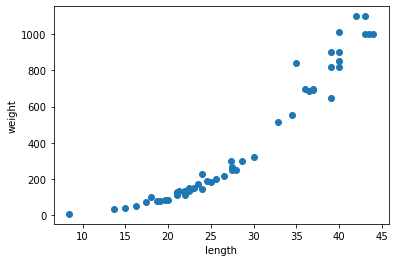

In [520]:
# 산점도 확인
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [521]:
# 훈련 세트와 테스트 세트 준비
# train_test_split() 함수 사용
# 1개의 데이터 세트(perch_lenght)만 사용

# scikit_learn의 훈련 세트는 2차원 배열을 사용
# 입력 데이터 세트를 2차원 배열 형태로 변경이 필요
# reshape(row, col) 함수 사용
# (42, ) -> (42, 1) 형태로 변경
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)
# reshape(-1, 1): -1: 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1)  # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1)  # 2차원 배열로 변경

print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


In [522]:
# k-최근접 이웃 회귀 알고리즘 정확도 계산
# k-최근접 이웃 회귀 알고리즘
# KNeighborsRegressor 클래스 사용
# n_neighboers: 기본 값 = 5
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
# 모델 훈련
knr.fit(train_input, train_target)

# score(): 훈련 모델 점수 확인, 결정 계수(R^2)를 리턴
print(knr.score(test_input, test_target))
# 결정계수

# score()
# 결정 계수(R^2)를 리턴함
# 출력하는 값이 높을 수록 정확도가 높음

0.992809406101064


In [523]:
# 결정 계수(R^2)
# 결정 계수 (R^2) 값
# 회귀식이 얼마나 정확한지를 나타내는 숫자 (0 <= R^2 <= 1)
# 0에 가까울수록, 회귀식의 정확도는 낮음
# 1에 가까울수록, 회귀식의 정확도는 높음
# R^2 = 1 - (target-예측)^2 의 합 / (target-target평균)^2 의 합

# R^2 = 0
# 평균값과 예측값이 비슷 (분모, 분자가 비슷)

# R^2 = 1
# (target-예측)^2의 값이 작아져야 됨 (분자가 0에 가까워짐)

In [524]:
# mean_absolute_error
# mean_absolute_error (MAE): 평균 절대 오차
# 타킷(실제 값)과 예측 값의 절대값 오차 평균
# MAE = 1/n 수열합|target_i-예측값_i|
# 절대값을 사용: 에러의 크기를 반영
# sklearn.merics 패키지 포함
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측값 계산
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 19g 정도의 오차 발생

19.157142857142862


In [525]:
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [526]:
# 과대적합 vs 과소적합
# 과대적합(overfitting)
# 훈련 세트에만 잘 맞는 모델
# 테스트 세트에서는 점수가 굉장히 나쁨
# 일반성이 떨어짐

# 과소적합(Underfitting)
# 훈련 세트보다 테스트 세트의 점수가 높거나,
# 훈련 세트와 테스트 세트의 두 점수가 모두 낮음
# 모델이 너무 단순해서 훈련 세트로 훈련이 되지 않은 경우

# 앞 예제에서 훈련 세트와 테스트 세트의 score() 비교
# 테스트 세트의 점수가 더 높음: 과소 적합(underfitting)

In [527]:
# 테스트 세트를 사용하여 R^2 값 계산
print(knr.score(test_input, test_target))

# 훈련 세트 R^2값 계산
print(knr.score(train_input, train_target))

# 테스트 세트의 값 > 훈련 세트의 값

0.992809406101064
0.9698823289099254


In [528]:
# 과대적합 (Overfit)
# OPtimal
# 과소적합 (underfit)

In [529]:
# 모델 개선: 이웃 개수 줄이기
# 과소 적합 해결 방안: 이웃의 개수 줄임
# 기본 값 5에서 n_neighbors = 3으로 변경
# 모델이 더 복잡해짐
# 훈련 세트의 국지적 패턴에 더 민감해짐
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

print('훈련 데이터로 모델의 정확도 점수 계산: ',
     knr.score(train_input, train_target))

print('테스트 데이터로 모델의 정확도 점수 계산: ',
     knr.score(test_input, test_target))
# 훈련 데이터의 점수가 높아짐 (기존: : 0.9698823289099254)

훈련 데이터로 모델의 정확도 점수 계산:  0.9804899950518966
테스트 데이터로 모델의 정확도 점수 계산:  0.9746459963987609


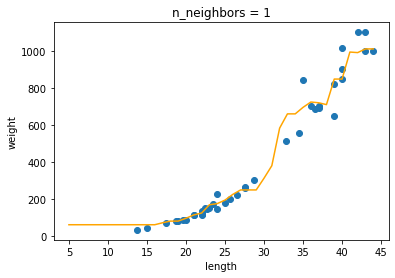

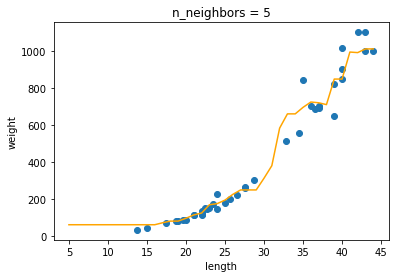

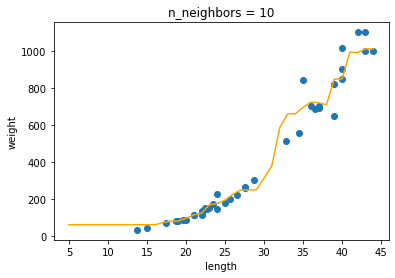

In [530]:
# 이웃의 수에 따른 그래프 비교
# k-최근접 회귀 알고리즘에서 이웃의 수 변경: 1, 5, 10
# 농어의 길이를 5~45까지 변경하면서 무게 예측
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()

# x: 농어의 길이(5 ~ 45까지 범위 설정)
x = np.arange(5, 45).reshape(-1, 1)
# n = 1, 5, 10일 때 예측 결과 그래프
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neightbors = n
    knr.fit(train_input, train_target)
    # n_neighbors의 값을 1, 5, 10으로 증가시키면서 모델 훈련
    
    # 지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction = knr.predict(x)
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label='train set')
    plt.plot(x, prediction, label='prediction', color='orange')
    
    plt.title('n_neighbors = {}'.format(n)) 
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()
# n의 값이 커질수록 모델이 단순(과소적합)

In [531]:
# 마무리 정리
# 회귀(Regression)
# 임의의 수치를 예측하는 문제
# k-최근접 이웃 회귀
# 가장 가까운 이웃 샘플을 찾고 타깃값을 평균하여 예측

# 과대 적합(Overfitting)
# 훈련 세트에만 잘 맞음(일반성이 떨어짐)
# 훈련 세트의 성능 > 테스트 세트 성능

# 과소 적합(Underfitting)
# 모델이 단순하여 훈련 세트의 패턴을 모두 잡아내지 못함
# 훈련 세트와 테스트 세트의 성능이 모두 낮거나
# 훈련 세트의 성능 < 테스트 세트의 성능

## 선형 회귀

In [532]:
# k-최근접 이웃 알고리즘의 문제점 #1
# k-최근접 이웃 회귀 알고리즘의 문제점
# 가장 가까운 샘플을 찾아 평균값 계산
# 새로운 샘플이 훈련 세트의 범위를 벗어나면 잘못된 예측을 함
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5,	27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0,	40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])


In [533]:
# k-최근접 이웃 알고리즘의 문제점 #2
# 훈련 세트 밖의 샘플 예측
# 50cm, 100cm 길이의 농어 무게 예측: 동일한 예측값
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight ,random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print('50cm: ', knr.predict([[50]]))
print('100cm: ', knr.predict([[100]]))
# 100cm 농어의 예측값은 50cm 농어의 예측값과 동일: 1033g

50cm:  [1033.33333333]
100cm:  [1033.33333333]


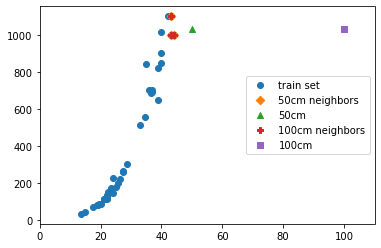

In [534]:
# k-최근접 이웃 알고리즘의 문제점 #3
# 50cm, 100cm 길이의 농어의 이웃 및 산점도 비교
# 50cm 농어의 이웃을 구함
distances_50, indexes_50 = knr.kneighbors([[50]])
# 100cm 농어의 이웃을 구함
distances_100, indexes_100 = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target, label='train set')

# 훈련 세트 중에서 50cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50], train_target[indexes_50],
           marker='D', label='50cm neighbors')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^', label='50cm')

# 훈련 세트 중에서 100cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_100], train_target[indexes_100],
           marker='P', label='100cm neighbors')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='s', label='100cm')

plt.xlim(0, 110)
plt.legend(loc=5)
plt.show()

In [535]:
# k-최근접 이웃 회귀 알고리즘의 문제점 #4
# 50cm 농어와 100cm 농어의 이웃 비교

# 훈련데이터에서 이웃 데이터의 인덱스 확인
print('50cm neighbor indexes: ', indexes_50)
print('100cm neighbor indexes: ', indexes_100)

# 이웃 데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

# k-최근점 이웃 회귀: 이웃의 평균을 구함
# 50cm 농어의 이웃과 100cm 농어의 이웃이 동일함
# 서로 다른 길이의 무게 예측: 이웃의 평균값을 사용
# 50cm 농어와 100cm 농어의 무게 예측값(1033g)이 동일한 문제점 발생
# 해결 방안?

50cm neighbor indexes:  [[34  8 14]]
100cm neighbor indexes:  [[34  8 14]]
1033.3333333333333
1033.3333333333333


In [536]:
# 선형 회귀(Linear Regression)
# 선형 회귀
# 데이터를 가장 잘 표현할 수 있는 직선 방정식을 찾는 알고리즘
# 특성과 타킷 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾음
# 특성과 타킷 사이의 관계: 선형 방정식의 계수(기울기) 와 절편에 저장

# LinearRegression 클래스 사용
# sklearn.linear_model 패키지
# fit(), score(), predict() 메소드
# 머신러닝 알고리즘이 해당 직선을 찾음

In [537]:
# 훈련 데이터를 이용한 직선 방정식 구하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대한 예측
print('50cm: ', lr.predict([[50]]))

# 기울기(a): coef_, 절편(bias): intercept_
print(lr.coef_, lr.intercept_)
# 하나의 특성(농어의 길이)만 사용했기 때문에 배열의 원소는 1개
# 농어 무게 = a*농어 길이 + b

50cm:  [1241.83860323]
[39.01714496] -709.0186449535477


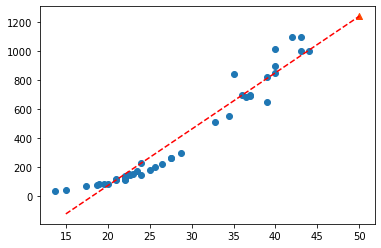

In [538]:
# 산점도 및 직선 그래프 그리기
# 기울기와 절편을 이용한 1차 방정식 그래프
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
# plot([x축 데이터:시작, 끝], [축 데이터:시작, 끝])
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
        color='red', linestyle='--')

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^', color='orangered')
plt.show()
# 농어 무게가 0이하로 내려갈 수 있는 문제점

In [539]:
print('train data score: ',
     lr.score(train_input, train_target))
print('test data score: ',
     lr.score(test_input, test_target))
# 전체적으로 과소 적합(훈련 세트와 테스트 세트의 점수가 모두 낮음)

train data score:  0.939846333997604
test data score:  0.8247503123313558


In [540]:
# 다항 회귀(Polynomial Regression)
# 농어의 길이와 무게에 대한 산점도
# 일직선(1차 방정식)으로 표현하기 어려움
# 무게가 0 이하일 가능성 발생
# 모델이 더 복잡할 필요성이 있음

# 최적의 곡선(2차 방정식)을 구함
# 길이를 제곱한 항을 훈련 세트에 추가해야 됨
# 농어 무게 = a*길이^2 + b*길이 + c

In [541]:
# 훈련 세트에 데이터 추가
# 길이를 제곱한 데이터를 훈련 세트에 추가
# column_stack() 사용
# broadcasting 적용
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


In [542]:
# 다항 회귀식 구하기
# 선형 회귀 모델 재훈련
# 제곱한 데이터를 이용하여 선형 회귀 모델을 다시 훈련
# 타깃값은 그대로 사용함
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))  # 50cm 농어의 무게 예측
print(lr.coef_, lr.intercept_)  # 순서대로 a, b, c로 사용
# 농어 무게 = a*길이^2 + b*길이 + c <- 다항 회귀식(Polynomial Regression)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278259


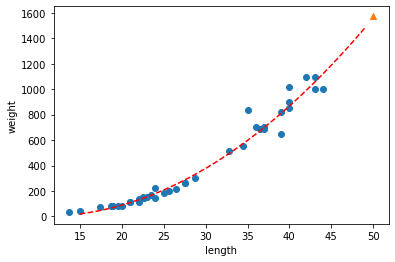

In [543]:
# 다항 회귀식을 이용한 그래프 그리기
# 훈련 세트의 산점도와 2차 방정식 그래프
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듦
point = np.arange(15, 50)
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05,
        color='red', linestyle='--')

# 50cm 농어 데이터(무게:1574g)
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [544]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 테스트 세트의 점수가 높음(과소 적합이 남아 있음)

0.9706807451768623
0.9775935108325121


In [545]:
# 내용 정리
# k-최근접 이웃 회귀
# 거리에 상관 없이 가장 가까운 이웃의 값을 평균하여 예측
# 50cm, 100cm 길이의 농어 무게를 동일하게 예측
# 훈련 세트 범위 밖의 샘플을 예측할 수 없음

# 선형 회귀
# 훈련 세트에 잘 맞는 직선 방정식을 구함
# 기울기(coef_)와 절편(intercept_)을 계산
# 훈련 세트를 벗어난 범위의 데이터를 예측할 수 있음
# 모델이 단순: 농어의 무게가 음수일 가능성 발생

# 다항 회귀
# 선형 회귀의 문제점을 해결하기 위해 다항 회귀 사용
# 2차 방정식의 그래프 형태
# 여전히 과소 적합이 존재

## 특성 공학과 규제

In [546]:
# 다중 회귀 (Multiplt Regression)
# 다중 회귀
# 여러 특성을 사용한 선형 회귀
# 길이, 높이, 두께 사용
# 다양한 특성의 조합을 생성

# PolynomialFeatures 클래스 사용

# 특성 공학 (Feature engineering)
# 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업
# 특성이 2개인 경우, 평면을 학습

In [547]:
# Pandas로 데이터 준비
# 데이터 준비
# csv 파일 => Pandas 데이터프레임 => Numpy 배열
#              pd.read_csv()       to_numpy()
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()  # DataFrame을 Numpy의 array로 변환
print(perch_full[:5])
print(perch_full.shape)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
(56, 3)


In [548]:
# 훈련 세트와 테스트 세트로 분리
# target 데이터(perch_weight)는 기존과 동일
# perch_full, perch_weight를 훈련 세트와 테스트 세트로 분리
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])

    

In [549]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state=42)

In [550]:
# 사이킷런의 변환기 (Transformer)
# 다항 특성 만들기
# PolynomialFeatures 클래스 사용
# 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가

# PolynomialFeatures(include_bias=True)
# include_bias=True: bias(절편, 0차항) 추가
# include_bias=False: bias 삭제

# fit([a, b]) : 특성 조합을 찾음
# [1, a, b, a*b, a^2, b^2] 추가

# transform([[a, b]]): 특성 조합을 실제 데이터로 변환
# [1, a, b, a*b, a^2, b^2] 로 변환

In [551]:
# PolynomialFeatures 간단 예제
# PolynomialFeatures(include_bias=True)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()  # include_bias=True (기본값)
poly.fit([[2, 3]])  # 2, 3의 조합을 찾음(2^2, 3^2, 2*3)
print(poly.transform([[2, 3]]))  # 특성 조합을 데이터로 변환

[[1. 2. 3. 4. 6. 9.]]


In [552]:
# PolynomialFeatures(include_bias=False)
poly = PolynomialFeatures(include_bias=False)  # include_bias=False: 1 제거
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [553]:
# 다항 특성 만들기
# 훈련 세트(train_input)을 사용하여 다항 특성 만들기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)  # train_input 데이터를 이용하여 총 9개의 특성이 만들어짐

print(train_poly[0:3])
print(train_poly.shape)
test_poly = poly.transform(test_input)  # 테스트 세트 변환: fit()호출 안함
# 훈련 세트를 기준으로 만들어진 특성을 이용하여 테스트 세트를 변환하기 위함

[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
(42, 9)


In [554]:
# get_feature_names_out()
# 각 특성의 조합을 알려줌
print(poly.get_feature_names_out())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [555]:
# 다중 회귀 모델 훈련 #1
# 다중 회귀 모델 훈련
# 선형 회귀 모델 훈련과 동일 (여러 개의 특성을 사용할 뿐임)
# 특성이 늘어나면 선형 회귀의 정확도 증가
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [556]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [557]:
# 다중 회귀 모델 훈련 #2
# degree 증가
# 고차항의 최대 차수 지정
# 3제곱, 4제곱 5제곱 항 추가
# 고차항의 최대 차수 증가 (5차)
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [558]:
# 선형 회귀 모델 훈련 및 점수 계산
# 선형 회귀 모델 훈련 및 훈련 세트 점수 계산
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

# 테스트 세트 점수 계산
print(lr.score(test_poly, test_target))
# 훈련 세트에 과대 적합

0.9999999999938143
-144.40744532797535


In [559]:
# 규제 (Regularization)
# 규제
# 모델이 훈련 세트에 과대 적합되는 것을 방지
# 선형 회귀 모델: 특성에 곱해지는 계수의 크기를 작게 줄임

# L1 규제 (L1 Regularization)
# 계수(가중치)의 합을 더한 값에 규제 강도를 곱하여 오차에 더함
# 어떤 가중치는 0이 됨

# L2 규제 (L2 Regularization)
# 각 계수(가중치) 제곱의 합에 규제 강도를 곱함
# 규제 강도를 크게 하면 가중치가 더 감소(규제 강화),
# 규제 강도를 작게 하면 가중치가 증가

# 규제 전에 표준화 과정이 필요
# 각 특성의 크기(스케일)가 다르기 때문에 표준화 과정이 필요
# StandardScaler 클래스 사용

In [560]:
# 표준화
# StandardScaler 클래스를 사용한 표준화
# 평균과 표준 편차 사용
# fit(), transform() 사용
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [561]:
# 규제 모델
# 릿지(Ridge) 모델: L2 regularization
# 계수를 제곱한 값을 기준으로 규제
# 특성의 중요도가 전체적으로 비슷한 경우 사용

# 라쏘(Lasso) 모델: L1 regularization
# 계수(가중치)의 절대값을 기준으로 규제
# 여러 특성 중 일부분만 중요한 경우 사용

In [562]:
# 릿지 회귀
# 릿지 회귀
# sklearn.linear_model 패키지
# fit()로 훈련, score() 메소드로 평가
# Ridge(alpha=1.0)
# alpha값이 크면 규제 강도가 세짐(계수 값을 더 줄임)
from sklearn.linear_model import Ridge

ridge = Ridge()  # alpha=1.0
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))  # 훈련 세트 점수 확인

0.9896101671037343


In [563]:
# 테스트 세트의 점수가 정상으로 돌아옴
print(ridge.score(test_scaled, test_target))

0.9790693977615386


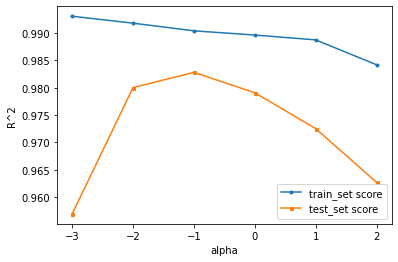

In [564]:
# 릿지 회귀: 적절한 규제 강도 찾기
# 적절한 alpha 값 찾기
# alpha 값을 변경하면서 결정 계수(R^2)의 값을 비교
# alpha=0.1 (-1은 log 적용 10^-1)일 때, 두 그래프가 가장 가까움
# 적절한 alpha값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    # 훈련 세트와 테스트 세트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score,
        label='train_set score', marker='o', markersize=3)
plt.plot(np.log10(alpha_list), test_score,
        label='test_set score', marker='s', markersize=3)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()   # 10^-3: 과대 적합, 10^-1: 적합

In [565]:
# 릿지 회귀: 최적의 alpha 적용
# alpha=0.1 적용시 점수 확인
# alpha=0.1 적용
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


In [566]:
# 라쏘(Lasso) 회귀
# 라쏘 회귀
# 불필요한 계수를 급격히 감소, 0으로 만들어 제거
# sklearn.linear_model 패키지
# fit()로 훈련, score()메소드로 평가
# Lasso(alpha=1.0)
# alpha값이 크면 규제 강도가 세짐 (계수 값을 더 줄임)
# alpha=0.0: 기존 선형 회귀와 동일
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [567]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


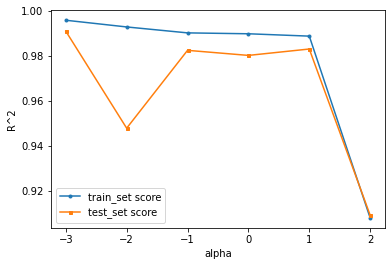

In [572]:
# 라쏘 회귀: 적절한 규제 강도 찾기
# 적절한 alpha 값 찾기
# alpha 값을 변경하면서 결정 계수(R^2)의 값을 비교
# alpha=10일 때, 최적 (10^1=10)
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=100000000)  # 경고뜨면 max_iter(학습 횟수?) 값을 올리면 됨
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다.
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score,
        label='train_set score', marker='o', markersize=3)
plt.plot(np.log10(alpha_list), test_score,
        label='test_set score', marker='s', markersize=3)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()
# 10^1: 최적

In [573]:
# 라쏘 회귀: 최적의 alpha적용
# alpha=10
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


## 참고자료

In [574]:
# 표준화, 정규화 차이
# 피처 스케일링
# 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

# 표준화(Standardization)
# Z-score: 평균(뮤)이 0이고, 표준편차(시그마) 1인 정규분포 생성
# 이상치(outlier)를 파악
# 선형 회귀는 데이터가 정규 분포를 가진다는 가정하에 구현되어 있음
# StandardScaler 클래스 사용
# Z = 특성값 - 평균 / 표준편차

# 정규화(Normalization)
# 모든 값을 0~1 사이의 값으로 바꿈
# 특성들의 크기가 다를 때 크기를 통일하기 위해 사용
# MinMaxScaler 클래스 사용
# x' = x - x_min / x_max - x_min (x_max:최대값, x_min:최소값)